# NumPy

The NumPy library provides support for arrays, matricies and mathematical functions to operate on them. We'll start with the basics and then cover a few more advanced topics.

## The N-dimensional array (ndarray) and array basics

The core of NumPy is the n-dimensional array (ndarray). Although it may seem similar to Python lists or the array.array class, there are some important differences. ndarrays ...

+ are homogenous, all elements must be of the same type (unlike list)
+ can be multidimensional (unlike array.array)
+ have much more functionality

We'll dive in with an example. The arange function is analogous to Python's range function, while reshape does exactly what you would expect and reshapes an array into a specified shape.

+ ndarray.ndim: number of dimensions or rank
+ ndarray.shape: tuple containing the dimensions of the array
+ ndarray.dtype: data type of elements
+ ndarray.size: total number of elements (product of dimensions)

### Library Dependancies
Need numpy, operator, matplotlib, collections. The operator and collections modules come pre-installed in the Python Standard Library. Install the rest using pip: ```pip install numpy```, ```pip install matplotlib```.

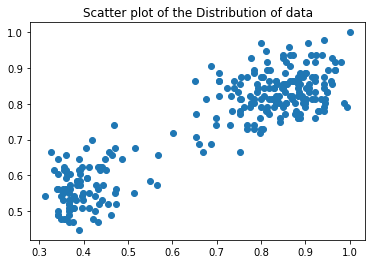

In [31]:
import numpy as np
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt
import math

from cgi import test
from cmath import sqrt

df = pd.read_csv (r'/Users/jakobtolstrup/Desktop/Areas/SD/Data Mining/Exercises 5/k-means-clustering/geyserData.csv', delimiter=',')
df['class'] = 0
df = df.reset_index(drop=True) # Remove the index from the file
df['eruptions'] = df['eruptions'] / max(df['eruptions']) # Normalize eruptions
df['waiting'] = df['waiting'] / max(df['waiting']) # Normalize waiting

plt.title('Scatter plot of the Distribution of data')   #
plt.scatter(df['eruptions'],df['waiting'])              # Visualizing the distribution
plt.show()


In [32]:
def initializeMeans(df):

#Intialize the means by randomly taking two points from the dataframe.

    x = df.sample(2) # We pick two random points
    m1 = x.iloc[0] 
    m2 = x.iloc[1] 

    return m1, m2

initializeMeans(df)



(eruptions    0.676471
 waiting      0.812500
 class        0.000000
 Name: 22, dtype: float64,
 eruptions    0.39549
 waiting      0.62500
 class        0.00000
 Name: 76, dtype: float64)

In [33]:

def euclideanDist(df,pointIDX,mean1,mean2):

    #Take the index of the point in the dataframe you want to calculate the 
    #distance from and calculate the euclidean distance to both means.
    # return a pandas dataframe (or pandas series) with the closest mean assigned to column 'class' given the pointIDX

    # We separate the values from our inputs into separate points
    point = df.iloc[[pointIDX]].squeeze()
    pp1, pp2, pc = point
    mp1, mp2, c1 = mean1
    mq1, mq2, c2 = mean2
    
    # We calculate the distance between the points and the
    dist1 = sqrt((mp1-pp1)**2 + (mp2+pp2)**2).real
    dist2 = sqrt((mq1-pp1)**2 + (mq2+pp2)**2).real

    #  is closest to point
    if(dist1 < dist2):
        df.iat[pointIDX, 2] = 1
    else:
        df.iat[pointIDX, 2] = 2
    return df # here we return the same dataframe


m1, m2 = initializeMeans(df)
b = euclideanDist(df, 5, m1,m2)



In [34]:
def updateMean(df):
    """
    df is the dataframe of points containing the assigned classes
    return updated mean1 and mean2 based on the value in column 'class'. mean1 and mean2 should still be pandas dataframes (or pandas series)
    """
    m1 = df.loc[df['class']==0].mean()
    m2 = df.loc[df['class']==1].mean()

    return m1, m2


Iteration 0/0
Iteration 1/1
Iteration 2/2
Iteration 3/3
Iteration 4/4


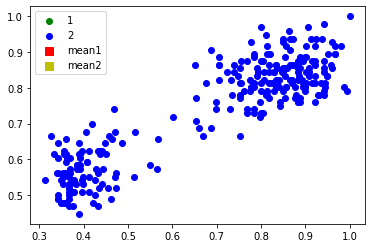

In [35]:
def Kmeans(df,iterations):
    mean1,mean2 = initializeMeans(df)

    for iteration in range(iterations): # Change this when implementing how many times it should recalculate the mean

        print("Iteration {}/{}".format(iteration,iteration))
        
        for i in range(len(df)):
            df = euclideanDist(df,i,mean1,mean2)
            
        mean1,mean2 = updateMean(df)

    return df,mean1,mean2

df,mean1,mean2 = Kmeans(df,5)

plt.clf()
plt.scatter(df.loc[df['class'] == 1]['eruptions'],df.loc[df['class'] == 1]['waiting'],color='g',label='1')  #
plt.scatter(df.loc[df['class'] == 2]['eruptions'],df.loc[df['class'] == 2]['waiting'],color='b',label='2')  #
                                                                                                            #
plt.scatter(mean1['eruptions'],mean1['waiting'],s=70,label='mean1',marker='s',color='r')                    # Visualizing the final class distribution
plt.scatter(mean2['eruptions'],mean2['waiting'],s=70,label='mean2',marker='s',color='y')                    #
                                                                                                            #
plt.legend()                                                                                                #
plt.show()
